In [115]:
import warnings
warnings.filterwarnings('ignore')

# Import file and examine for missing values

In [116]:
import pandas as pd

In [117]:
water = pd.read_csv("Data/water_potability.csv")

In [118]:
water.shape

(3276, 10)

In [119]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [120]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


# Split Model and Holdout Data

In [121]:
features = water.drop(columns = 'Potability').columns

X = water[features]

target = water['Potability']

y = target

from sklearn.model_selection import train_test_split

X_model, X_holdout, y_model, y_holdout = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

pd.concat([X_holdout, y_holdout.to_frame()], axis=1).to_csv('Data/holdout_set.csv')

pd.concat([X_model, y_model.to_frame()], axis=1).to_csv('Data/model_set.csv')

water = pd.read_csv('Data/model_set.csv', index_col = 'Unnamed: 0')


# Look for correltion, colinearity. 

In [122]:
water.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.060864,-0.097136,-0.030211,0.025414,0.020782,0.052468,0.005244,-0.030541,0.012307
Hardness,0.060864,1.000000,-0.042984,-0.035643,-0.081177,-0.021388,0.007359,-0.001842,-0.017436,-0.000571
Solids,-0.097136,-0.042984,1.000000,-0.091705,-0.211047,0.000157,0.024548,-0.026095,0.014920,0.025698
Chloramines,-0.030211,-0.035643,-0.091705,1.000000,0.037692,-0.021112,-0.006350,0.005733,0.007922,0.016957
Sulfate,0.025414,-0.081177,-0.211047,0.037692,1.000000,-0.022458,0.014874,-0.014184,-0.009809,-0.001512
Conductivity,0.020782,-0.021388,0.000157,-0.021112,-0.022458,1.000000,0.010328,0.006614,0.000507,0.009651
Organic_carbon,0.052468,0.007359,0.024548,-0.006350,0.014874,0.010328,1.000000,0.015266,-0.005719,-0.014839
Trihalomethanes,0.005244,-0.001842,-0.026095,0.005733,-0.014184,0.006614,0.015266,1.000000,-0.018541,-0.005737
Turbidity,-0.030541,-0.017436,0.014920,0.007922,-0.009809,0.000507,-0.005719,-0.018541,1.000000,0.004186
Potability,0.012307,-0.000571,0.025698,0.016957,-0.001512,0.009651,-0.014839,-0.005737,0.004186,1.000000


In [123]:
water

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
2118,8.884935,145.277706,17621.390115,8.267974,341.477474,286.890777,15.194724,42.289054,4.714163,0
1567,NaN,187.043283,24634.552443,9.081880,NaN,443.843399,11.053925,74.108180,3.498717,1
69,7.261551,179.889788,24964.777703,5.837086,349.269271,501.182781,17.287713,50.993006,3.636364,0
2439,7.895769,168.724047,28723.617627,9.341475,353.976181,517.436676,11.992772,79.860552,4.391731,1
1582,9.723377,190.897421,9076.646483,9.752088,357.384709,443.037417,13.307824,62.826687,4.072063,1
...,...,...,...,...,...,...,...,...,...,...
101,7.348845,223.264940,11519.046527,8.889559,NaN,494.158434,18.145374,73.715522,4.880875,0
1734,3.928556,191.665998,17328.161457,7.692417,306.479558,406.085614,9.578602,45.480738,5.060836,0
1071,7.774468,216.752872,22316.398284,7.947534,385.043438,288.068578,14.136699,68.861861,3.891097,1
2924,7.833980,203.169408,11174.274760,6.246502,394.890809,338.231122,16.276592,47.931639,4.254477,0


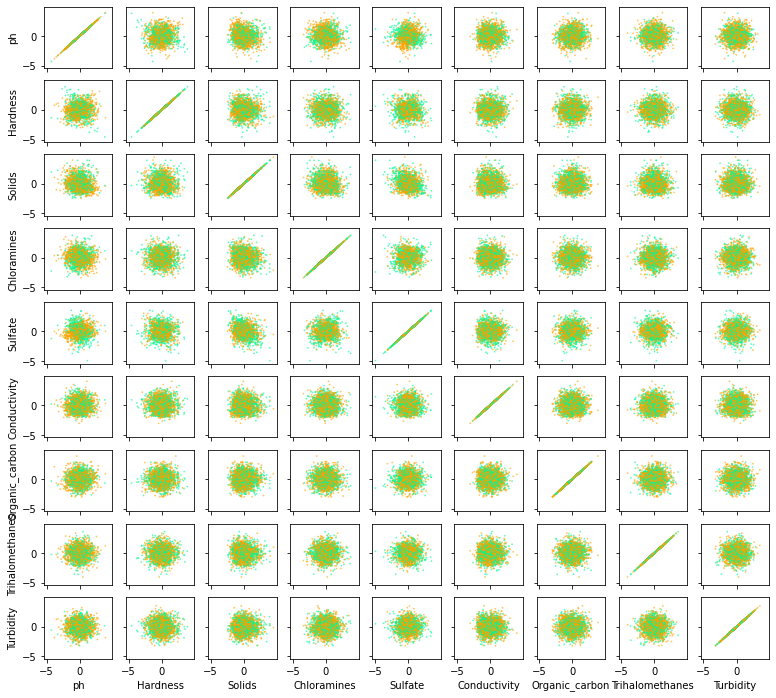

In [124]:
import matplotlib.pyplot as plt

dataset = water.copy()

features = ['ph', 'Hardness', 'Solids', 'Chloramines','Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for feature in features:
    dataset[feature] = (dataset[feature] - dataset[feature].mean())/(dataset[feature].std())

fig, axs = plt.subplots(9, 9, figsize = (13,12), sharex = True, sharey = True)

colors = {0:'orange', 1:'mediumspringgreen'}

for a in range(0,9,1):
    for b in range(0,9,1):
        axs[a, b].scatter(dataset[features[b]], dataset[features[a]], c=dataset['Potability'].map(colors), alpha = 0.5, s = 0.75)
        if a == len(features) - 1:
            axs[a, b].set_xlabel(features[b])
        if b == 0:
            axs[a, b].set_ylabel(features[a])    
        

In [125]:
water['Drinkable'] = water['Potability']

In [126]:
water['Drinkable'].replace({0: 'No', 1:'Yes'}, inplace = True)

<AxesSubplot:xlabel='Turbidity', ylabel='Drinkable'>

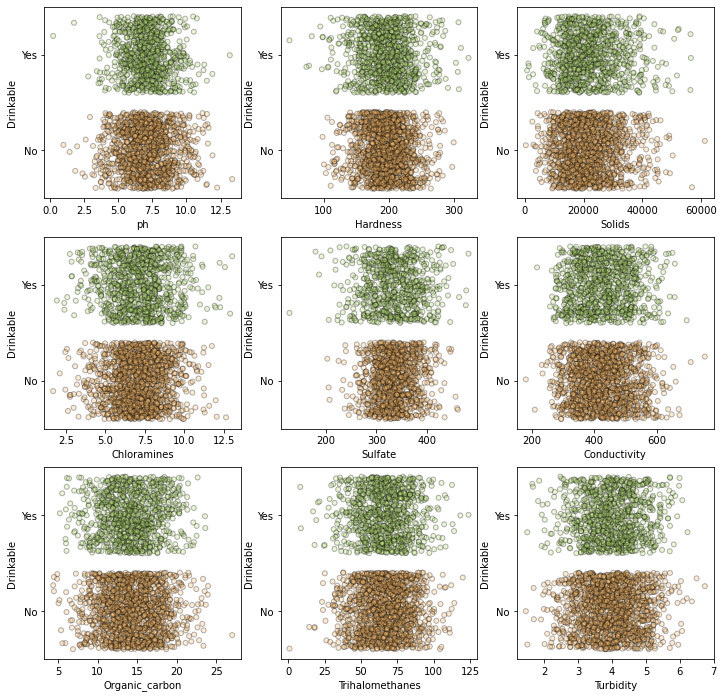

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(3, 3, figsize = (12,12))

sns.stripplot(ax = axs[0, 0], x='ph', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[0, 1], x='Hardness', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[0, 2], x='Solids', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[1, 0], x='Chloramines', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[1, 1], x='Sulfate', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[1, 2], x='Conductivity', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[2, 0], x='Organic_carbon', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[2, 1], x='Trihalomethanes', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.stripplot(ax = axs[2, 2], x='Turbidity', y='Drinkable', data=water, order = ['Yes', 'No'],
              jitter = 0.4, linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")






<AxesSubplot:xlabel='Turbidity', ylabel='Potability'>

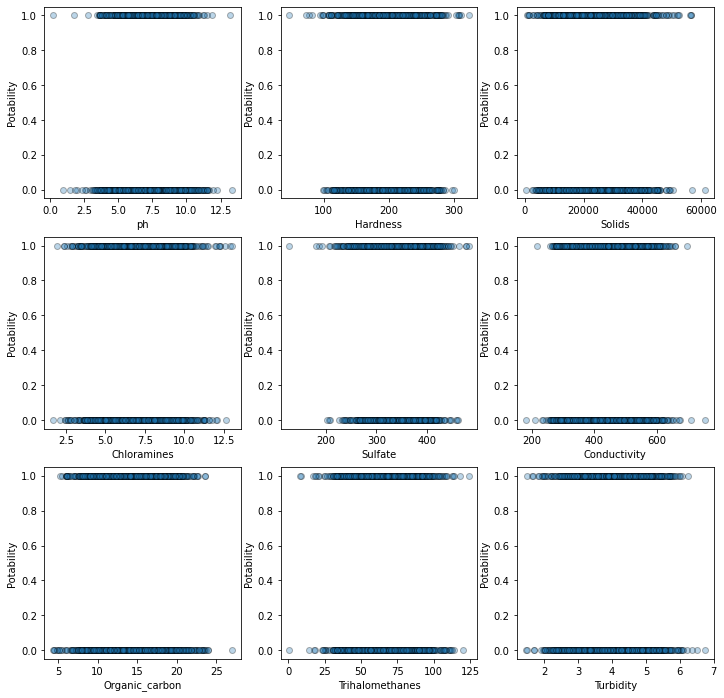

In [128]:
fig, axs = plt.subplots(3, 3, figsize = (12,12))

sns.scatterplot(ax = axs[0, 0], x='ph', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[0, 1], x='Hardness', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[0, 2], x='Solids', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[1, 0], x='Chloramines', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[1, 1], x='Sulfate', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[1, 2], x='Conductivity', y='Potability', data=water,
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[2, 0], x='Organic_carbon', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[2, 1], x='Trihalomethanes', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")
sns.scatterplot(ax = axs[2, 2], x='Turbidity', y='Potability', data=water, 
              linewidth=1, alpha = 0.3, 
              edgecolor = 'k', palette="RdYlGn_r")


# Determine imputer-type for ph, sulfate and trihalomethanes

In [129]:
water['ph'].mean()

7.081347850044675

In [130]:
water['ph'].median()

7.031761612177099

Text(0.5, 1.0, 'Trihalomethanes')

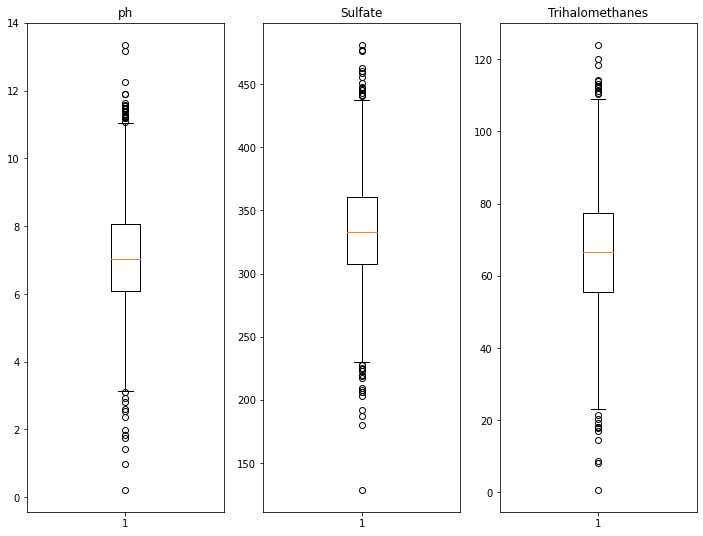

In [131]:
fig, axs = plt.subplots(1, 3, figsize = (12,9))
axs[0].boxplot(water['ph'].dropna(), meanline = True)
axs[1].boxplot(water['Sulfate'].dropna(), meanline = True)
axs[2].boxplot(water['Trihalomethanes'].dropna(), meanline = True)

axs[0].set_title('ph')
axs[1].set_title('Sulfate')
axs[2].set_title('Trihalomethanes')



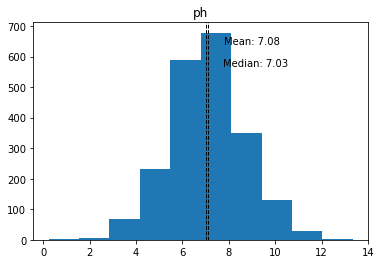

In [132]:
plt.hist(water['ph'].dropna())
plt.axvline(water['ph'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(water['ph'].median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(water['ph'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(water['ph'].mean()))
plt.text(water['ph'].median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(water['ph'].median()))
plt.title('ph')
plt.show()

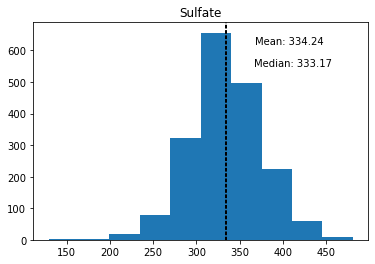

In [133]:
plt.hist(water['Sulfate'].dropna())
plt.axvline(water['Sulfate'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(water['Sulfate'].median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(water['Sulfate'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(water['Sulfate'].mean()))
plt.text(water['Sulfate'].median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(water['Sulfate'].median()))
plt.title('Sulfate')
plt.show()

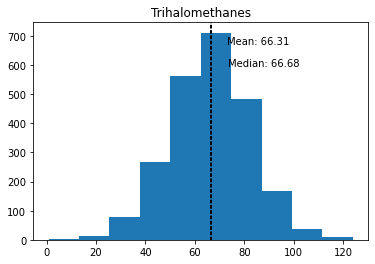

In [134]:
plt.hist(water['Trihalomethanes'].dropna())
plt.axvline(water['Trihalomethanes'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(water['Trihalomethanes'].median(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(water['Trihalomethanes'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(water['Trihalomethanes'].mean()))
plt.text(water['Trihalomethanes'].median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(water['Trihalomethanes'].median()))
plt.title('Trihalomethanes')
plt.show()

# Should we use 'is missing' columns

In [135]:
water.groupby('Potability').count()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
Potability,,,,,,,,,,
0,1262,1498,1498,1498,1129,1498,1498,1410,1498,1498
1,826,959,959,959,737,959,959,920,959,959


In [136]:
Percentage_Drinkable = 959/(1498+959)
Percentage_Drinkable

0.3903133903133903

In [137]:
water.groupby(['ph', 'Potability'], dropna=False).count().sort_values('ph')

,,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
ph,Potability,,,,,,,,,
0.227499,1,1,1,1,1,1,1,1,1,1
0.975578,0,1,1,1,1,1,1,0,1,1
1.431782,0,1,1,1,1,1,1,1,1,1
1.757037,1,1,1,1,1,1,1,1,1,1
1.844538,0,1,1,1,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
12.246928,0,1,1,1,1,1,1,1,1,1
13.175402,1,1,1,1,1,1,1,0,1,1
13.349889,0,1,1,1,1,1,1,1,1,1


In [138]:
Percentage_Drinkable = 133/(133+236)
Percentage_Drinkable

0.3604336043360434

In [139]:
water.groupby(['Trihalomethanes', 'Potability'], dropna=False).count().sort_values('ph')


,,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Turbidity,Drinkable
Trihalomethanes,Potability,,,,,,,,,
70.852672,0,0,1,1,1,1,1,1,1,1
85.381682,1,0,1,1,1,1,1,1,1,1
85.428785,1,0,1,1,1,0,1,1,1,1
71.704595,0,0,1,1,1,1,1,1,1,1
48.384960,0,0,1,1,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
61.146087,1,1,1,1,1,1,1,1,1,1
61.205470,1,1,1,1,1,1,1,1,1,1
61.122644,0,1,1,1,1,1,1,1,1,1


In [140]:
Percentage_Drinkable = 39/(39+88)
Percentage_Drinkable

0.30708661417322836

In [141]:
water.groupby(['Sulfate', 'Potability'], dropna=False).count().sort_values('ph')


,,ph,Hardness,Solids,Chloramines,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Drinkable
Sulfate,Potability,,,,,,,,,
283.755824,1,0,1,1,1,1,1,1,1,1
343.635821,0,0,1,1,1,1,1,1,1,1
320.449328,0,0,1,1,1,1,1,1,1,1
384.943779,0,0,1,1,1,1,1,0,1,1
290.311034,1,0,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
319.477187,1,1,1,1,1,1,1,1,1,1
319.463491,0,1,1,1,1,1,1,1,1,1
320.260120,0,1,1,1,1,1,1,1,1,1


In [142]:
Percentage_Drinkable = 222/(222+369)
Percentage_Drinkable

0.3756345177664975

In [143]:
import numpy as np

x = water['ph']
condlist = [x == 'NaN', x != 'NaN']
choicelist = [1, 0]
water['ph_missing'] = np.select(condlist, choicelist)

y = water['Sulfate']
condlist = [y == 'NaN', y != 'NaN']
choicelist = [1, 0]
water['Sulfate_missing'] = np.select(condlist, choicelist)

z = water['Trihalomethanes']
condlist = [z == 'NaN', z != 'NaN']
choicelist = [1, 0]
water['Trihalomethanes_missing'] = np.select(condlist, choicelist)

# Run Imputer

In [144]:
water = water.drop(columns = 'Drinkable')

In [145]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(missing_values=np.NaN, strategy = 'mean')
water_imputed =pd.DataFrame(imp.fit_transform(water))
water_imputed.columns=water.columns
water_imputed.index=water.index

In [146]:
water_imputed

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability,ph_missing,Sulfate_missing,Trihalomethanes_missing
2118,8.884935,145.277706,17621.390115,8.267974,341.477474,286.890777,15.194724,42.289054,4.714163,0.0,0.0,0.0,0.0
1567,7.081348,187.043283,24634.552443,9.081880,334.238580,443.843399,11.053925,74.108180,3.498717,1.0,0.0,0.0,0.0
69,7.261551,179.889788,24964.777703,5.837086,349.269271,501.182781,17.287713,50.993006,3.636364,0.0,0.0,0.0,0.0
2439,7.895769,168.724047,28723.617627,9.341475,353.976181,517.436676,11.992772,79.860552,4.391731,1.0,0.0,0.0,0.0
1582,9.723377,190.897421,9076.646483,9.752088,357.384709,443.037417,13.307824,62.826687,4.072063,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,7.348845,223.264940,11519.046527,8.889559,334.238580,494.158434,18.145374,73.715522,4.880875,0.0,0.0,0.0,0.0
1734,3.928556,191.665998,17328.161457,7.692417,306.479558,406.085614,9.578602,45.480738,5.060836,0.0,0.0,0.0,0.0
1071,7.774468,216.752872,22316.398284,7.947534,385.043438,288.068578,14.136699,68.861861,3.891097,1.0,0.0,0.0,0.0
2924,7.833980,203.169408,11174.274760,6.246502,394.890809,338.231122,16.276592,47.931639,4.254477,0.0,0.0,0.0,0.0


In [147]:
water_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 2118 to 1207
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ph                       2457 non-null   float64
 1   Hardness                 2457 non-null   float64
 2   Solids                   2457 non-null   float64
 3   Chloramines              2457 non-null   float64
 4   Sulfate                  2457 non-null   float64
 5   Conductivity             2457 non-null   float64
 6   Organic_carbon           2457 non-null   float64
 7   Trihalomethanes          2457 non-null   float64
 8   Turbidity                2457 non-null   float64
 9   Potability               2457 non-null   float64
 10  ph_missing               2457 non-null   float64
 11  Sulfate_missing          2457 non-null   float64
 12  Trihalomethanes_missing  2457 non-null   float64
dtypes: float64(13)
memory usage: 348.7 KB


# Train -test split

In [148]:
features = water_imputed.drop(columns = ['Potability']).columns
X = water_imputed[features]

target = water_imputed['Potability']
y = target

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

# Simple Logistic Regression

              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55       375
         1.0       0.36      0.43      0.39       240

    accuracy                           0.48       615
   macro avg       0.47      0.47      0.47       615
weighted avg       0.50      0.48      0.49       615



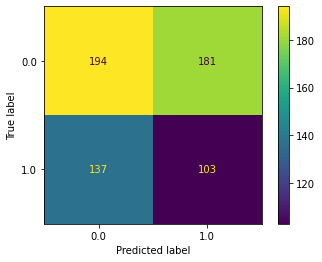

In [150]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state = 42, class_weight= 'balanced')
log_model.fit(X_train, y_train)

y_test_pred = log_model.predict(X_test)

from sklearn.metrics import plot_confusion_matrix, classification_report

plot_confusion_matrix(log_model, X_test, y_test)
print(classification_report(y_test, y_test_pred))

# Simple Decision tree

              precision    recall  f1-score   support

         0.0       0.64      0.86      0.74       375
         1.0       0.54      0.26      0.35       240

    accuracy                           0.62       615
   macro avg       0.59      0.56      0.54       615
weighted avg       0.60      0.62      0.59       615



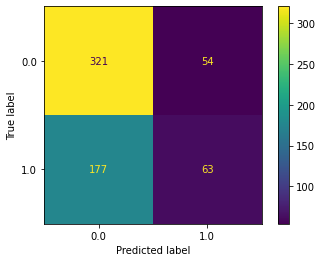

In [151]:
from sklearn.tree import DecisionTreeClassifier

water_dt = DecisionTreeClassifier(random_state = 42, max_depth = 5)
water_dt.fit(X_train, y_train)

y_test_pred = water_dt.predict(X_test)

plot_confusion_matrix(water_dt, X_test, y_test)
print(classification_report(y_test, y_test_pred))

# KNN

              precision    recall  f1-score   support

         0.0       0.65      0.90      0.76       375
         1.0       0.62      0.25      0.36       240

    accuracy                           0.65       615
   macro avg       0.64      0.58      0.56       615
weighted avg       0.64      0.65      0.60       615



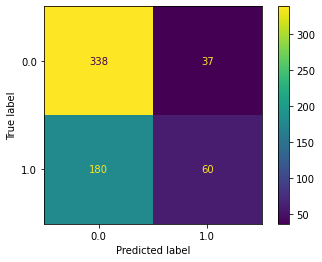

In [152]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

water_knn = KNeighborsClassifier(n_neighbors=10, p =1)

water_knn.fit(X_train_scaled, y_train)

y_knn_pred_test = water_knn.predict(X_test_scaled)

print(classification_report(y_test, y_knn_pred_test))
plot_confusion_matrix(water_knn, X_test_scaled, y_test)

# Polynomial Feature (2)

In [153]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(degree=2)
poly_water = poly.fit_transform(X)

water_columns = poly.get_feature_names(X.columns)
poly_water = pd.DataFrame(poly_water, columns=water_columns)


In [154]:
poly_water

,1,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,...,Turbidity^2,Turbidity ph_missing,Turbidity Sulfate_missing,Turbidity Trihalomethanes_missing,ph_missing^2,ph_missing Sulfate_missing,ph_missing Trihalomethanes_missing,Sulfate_missing^2,Sulfate_missing Trihalomethanes_missing,Trihalomethanes_missing^2
0,1.0,8.884935,145.277706,17621.390115,8.267974,341.477474,286.890777,15.194724,42.289054,4.714163,...,22.223337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,7.081348,187.043283,24634.552443,9.081880,334.238580,443.843399,11.053925,74.108180,3.498717,...,12.241019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,7.261551,179.889788,24964.777703,5.837086,349.269271,501.182781,17.287713,50.993006,3.636364,...,13.223144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,7.895769,168.724047,28723.617627,9.341475,353.976181,517.436676,11.992772,79.860552,4.391731,...,19.287304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,9.723377,190.897421,9076.646483,9.752088,357.384709,443.037417,13.307824,62.826687,4.072063,...,16.581700,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,1.0,7.348845,223.264940,11519.046527,8.889559,334.238580,494.158434,18.145374,73.715522,4.880875,...,23.822942,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2453,1.0,3.928556,191.665998,17328.161457,7.692417,306.479558,406.085614,9.578602,45.480738,5.060836,...,25.612061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2454,1.0,7.774468,216.752872,22316.398284,7.947534,385.043438,288.068578,14.136699,68.861861,3.891097,...,15.140638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2455,1.0,7.833980,203.169408,11174.274760,6.246502,394.890809,338.231122,16.276592,47.931639,4.254477,...,18.100576,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
y

2118    0.0
1567    1.0
69      0.0
2439    1.0
1582    1.0
       ... 
101     0.0
1734    0.0
1071    1.0
2924    0.0
1207    1.0
Name: Potability, Length: 2457, dtype: float64

### Resplit for polynomials

In [156]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(poly_water, y, random_state=42, test_size=0.25)

# Polynomial Feature (3)

In [157]:
#from sklearn.preprocessing import PolynomialFeatures

#poly=PolynomialFeatures(degree=3)
#poly_water = poly.fit_transform(X)
#water_columns = poly.get_feature_names(X.columns)
#poly_water = pd.DataFrame(poly_water, columns=water_columns)
#poly_water.head()

In [158]:
#X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(poly_water, y, random_state=42, test_size=0.25)

# Logistic Regression w/ Polynomial features and Standard Scaler

              precision    recall  f1-score   support

         0.0       0.70      0.65      0.68       380
         1.0       0.49      0.55      0.52       235

    accuracy                           0.61       615
   macro avg       0.60      0.60      0.60       615
weighted avg       0.62      0.61      0.62       615



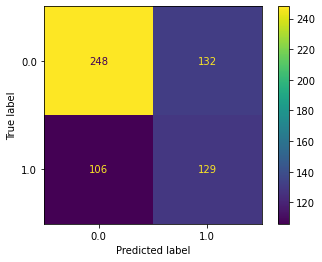

In [159]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_poly_train)
X_test_scaled = scaler.transform(X_poly_test)

lm_water = LogisticRegression(max_iter=500, random_state = 42, class_weight = 'balanced')
lm_water.fit(X_train_scaled, y_poly_train)

y_lm_pred_test = lm_water.predict(X_test_scaled)

print(classification_report(y_poly_test, y_lm_pred_test))
plot_confusion_matrix(lm_water, X_test_scaled, y_poly_test)

# Decision Tree w/ Polynomial Features and Grid Search

### Before Grid Search

              precision    recall  f1-score   support

         0.0       0.65      0.67      0.66       380
         1.0       0.44      0.42      0.43       235

    accuracy                           0.57       615
   macro avg       0.54      0.54      0.54       615
weighted avg       0.57      0.57      0.57       615



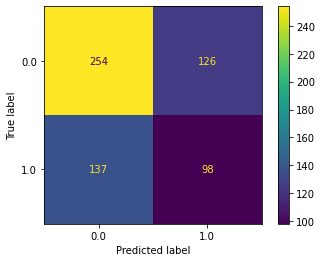

In [160]:
water_dt_poly = DecisionTreeClassifier(max_depth=100, min_samples_leaf=4, random_state=42)
water_dt_poly.fit(X_poly_train, y_poly_train)

y_pred_test = water_dt_poly.predict(X_poly_test)

print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(water_dt_poly, X_poly_test, y_poly_test)

### Implement Grid Search

Fitting 5 folds for each of 175 candidates, totalling 875 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 875 out of 875 | elapsed:    7.3s finished


0.2624203587411225
{'max_depth': 4, 'max_leaf_nodes': 5, 'min_samples_leaf': 6}
DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=6,
                       random_state=42)
              precision    recall  f1-score   support

         0.0       0.63      0.92      0.75       380
         1.0       0.52      0.14      0.23       235

    accuracy                           0.62       615
   macro avg       0.57      0.53      0.49       615
weighted avg       0.59      0.62      0.55       615



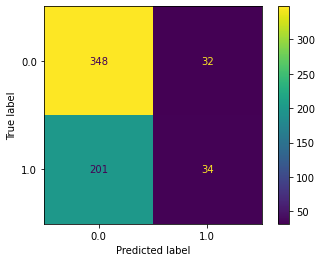

In [161]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[1,2,3,4,5], 'max_leaf_nodes':[3,4,5,6,7], 'min_samples_leaf': [6,7,8,9,10,12,15]}
grid_tree=GridSearchCV(water_dt_poly, param_grid, cv=5, scoring='f1', verbose=1, n_jobs=-1)

grid_tree.fit(X_poly_train, y_poly_train)

print(grid_tree.best_score_)
print(grid_tree.best_params_)
print(grid_tree.best_estimator_)

plot_confusion_matrix(grid_tree, X_poly_test, y_poly_test)

print(classification_report(y_poly_test, grid_tree.predict(X_poly_test)))

In [162]:
water_dt_gridsearched = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=6, random_state=42)

# Random Forest

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.7s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  1.4min finished


0.6765592225424939
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 45, 'n_estimators': 400}
RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=45, n_estimators=400)
              precision    recall  f1-score   support

         0.0       0.67      0.89      0.76       380
         1.0       0.62      0.29      0.40       235

    accuracy                           0.66       615
   macro avg       0.65      0.59      0.58       615
weighted avg       0.65      0.66      0.62       615



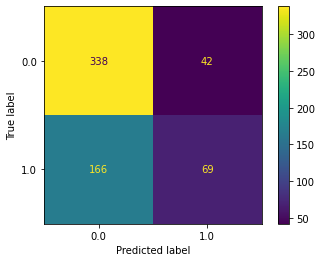

In [163]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV

grid = {
    "n_estimators" : [400, 500, 600],
    "max_depth": [30, 35,45],
    "criterion": ["gini", "entropy"],
     "class_weight": ["balanced"]
#     "min_samples_leaf" : range(3,10),
#     "max_features": [2,4,None]
    }

gs=GridSearchCV(RandomForestClassifier(), grid, cv=5, scoring="precision", n_jobs=-1, verbose=1)

gs.fit(X_poly_train, y_poly_train)

y_test_pred=gs.predict(X_poly_test)


# Single best score achieved across all params (min_samples_split)
print(gs.best_score_)

# Dictionary containing the parameters (min_samples_split) used to generate that score
print(gs.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(gs.best_estimator_)

#Identify the best score during fitting with cross-validation
print(classification_report(y_poly_test, y_test_pred))
plot_confusion_matrix(gs, X_poly_test, y_poly_test)

In [164]:
randomforest_gridsearched = RandomForestClassifier(class_weight='balanced', max_depth=45, n_estimators=600, random_state=42)

# One Feature: ph

In [165]:
X1 = water_imputed['ph']
y1 = water_imputed['Potability']

In [166]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42, test_size=0.25)

X_train1 = X_train1.values.reshape(-1,1)
X_test1 = X_test1.values.reshape(-1,1)

scaler = StandardScaler()
X_train_scaled1 = scaler.fit_transform(X_train1)
X_test_scaled1 = scaler.transform(X_test1)

# dt = DecisionTreeClassifier(max_depth=5)
# dt.fit(X_train_scaled, y_train)

lm = LogisticRegression(random_state=42, class_weight = 'balanced')

lm.fit(X_train_scaled1, y_train1)

LogisticRegression(class_weight='balanced', random_state=42)

              precision    recall  f1-score   support

         0.0       0.66      0.43      0.52       380
         1.0       0.41      0.64      0.50       235

    accuracy                           0.51       615
   macro avg       0.53      0.53      0.51       615
weighted avg       0.56      0.51      0.51       615



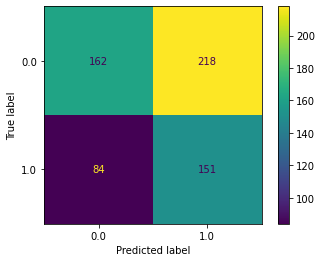

In [167]:
y_test_pred1 = lm.predict(X_test_scaled1)

print(classification_report(y_test1, y_test_pred1))
plot_confusion_matrix(lm, X_test_scaled1, y_test1)

# 5 Features

              precision    recall  f1-score   support

         0.0       0.61      0.51      0.55       380
         1.0       0.37      0.47      0.42       235

    accuracy                           0.49       615
   macro avg       0.49      0.49      0.48       615
weighted avg       0.52      0.49      0.50       615



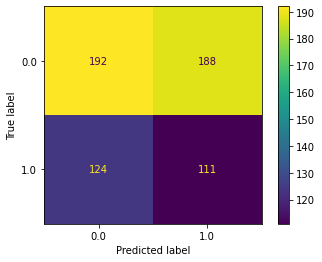

In [168]:
columns=["ph", "Sulfate", "Chloramines", "Turbidity", "Conductivity"]
X2=water_imputed[columns]
y2=water_imputed['Potability']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, random_state=42, test_size=0.25)

# X_train=X_train.values.reshape(-1,1)
# X_test=X_test.values.reshape(-1,1)

scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train2)
X_test_scaled2 = scaler.transform(X_test2)

# dt = DecisionTreeClassifier(max_depth=5)
# dt.fit(X_train_scaled, y_train)

lm = LogisticRegression(random_state=42, class_weight = 'balanced')
lm.fit(X_train_scaled2, y_train2)

y_test_pred = lm.predict(X_test_scaled2)

print(classification_report(y_test2, y_test_pred))
plot_confusion_matrix(lm, X_test_scaled2, y_test2)

# Gradient Boosting Classifier

              precision    recall  f1-score   support

         0.0       0.69      0.81      0.75       380
         1.0       0.58      0.42      0.49       235

    accuracy                           0.66       615
   macro avg       0.63      0.61      0.62       615
weighted avg       0.65      0.66      0.65       615



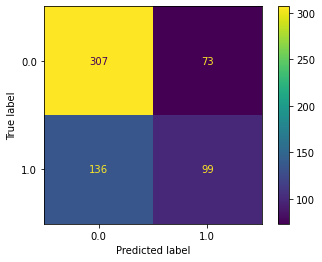

In [169]:
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state=42, learning_rate = 0.11, max_depth = 6, n_estimators = 270)

gbc.fit(X_poly_train, y_poly_train)

y_pred_test = gbc.predict(X_poly_test)


print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(gbc, X_poly_test, y_poly_test)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 11.9min finished


0.6100379789141069
{'learning_rate': 0.09, 'max_depth': 7, 'n_estimators': 260}
GradientBoostingClassifier(learning_rate=0.09, max_depth=7, n_estimators=260,
                           random_state=42)
              precision    recall  f1-score   support

         0.0       0.70      0.81      0.75       380
         1.0       0.58      0.43      0.50       235

    accuracy                           0.67       615
   macro avg       0.64      0.62      0.62       615
weighted avg       0.65      0.67      0.65       615



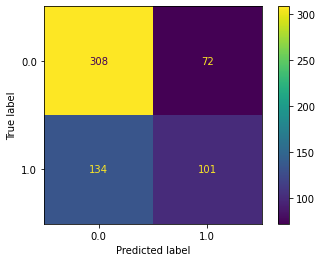

In [170]:
from sklearn.model_selection import GridSearchCV
param_grid = {'learning_rate':[0.08,0.085,0.09,0.1], 'max_depth':[6,7,8,9], 'n_estimators': [260,270,280]}

grid_tree=GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring='precision', verbose=1, n_jobs=-1)

grid_tree.fit(X_poly_train, y_poly_train)


print(grid_tree.best_score_)
print(grid_tree.best_params_)                             
print(grid_tree.best_estimator_)

print(classification_report(y_poly_test, grid_tree.predict(X_poly_test)))
plot_confusion_matrix(grid_tree, X_poly_test, y_poly_test)

# AdaBoost

### On grid-searched Decision tree

              precision    recall  f1-score   support

         0.0       0.69      0.72      0.70       380
         1.0       0.51      0.46      0.49       235

    accuracy                           0.62       615
   macro avg       0.60      0.59      0.59       615
weighted avg       0.62      0.62      0.62       615



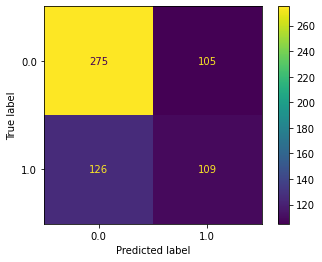

In [171]:
abc = AdaBoostClassifier(water_dt_gridsearched, random_state=42)

abc.fit(X_poly_train, y_poly_train)

y_pred_test = abc.predict(X_poly_test)

print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(abc, X_poly_test, y_poly_test)

### On grid-searched Random Forest

              precision    recall  f1-score   support

         0.0       0.68      0.90      0.77       380
         1.0       0.65      0.31      0.42       235

    accuracy                           0.67       615
   macro avg       0.67      0.60      0.60       615
weighted avg       0.67      0.67      0.64       615



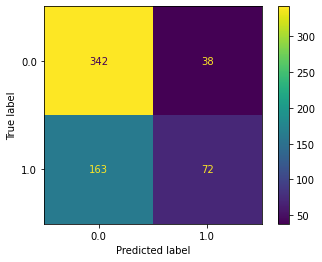

In [172]:
abc = AdaBoostClassifier(randomforest_gridsearched, random_state=42)

abc.fit(X_poly_train, y_poly_train)

y_pred_test = abc.predict(X_poly_test)

print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(abc, X_poly_test, y_poly_test)

# Bagging the Polynomial Decision Tree

In [173]:
from sklearn.ensemble import BaggingClassifier

              precision    recall  f1-score   support

         0.0       0.64      0.94      0.76       380
         1.0       0.62      0.16      0.25       235

    accuracy                           0.64       615
   macro avg       0.63      0.55      0.51       615
weighted avg       0.63      0.64      0.57       615



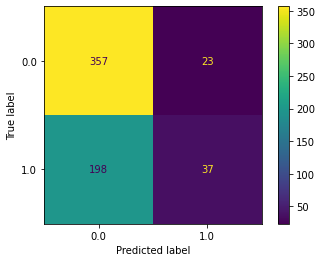

In [174]:
bc_dtc = BaggingClassifier(
            base_estimator=water_dt_gridsearched, 
            n_estimators= 250,
            max_samples= 0.75,
            max_features= 0.8,
            oob_score= True
                )

bc_dtc.fit(X_poly_train, y_poly_train)
y_pred_test = bc_dtc.predict(X_poly_test)

print(classification_report(y_poly_test, y_pred_test))
plot_confusion_matrix(bc_dtc, X_poly_test, y_poly_test)

# Gaussian Process Classifier

In [175]:
from sklearn.gaussian_process import GaussianProcessClassifier

In [176]:
columns=["ph", "Sulfate", "Chloramines"]
X=water_imputed[columns]
y=water_imputed.Potability

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [178]:
from sklearn.gaussian_process.kernels import RBF

              precision    recall  f1-score   support

         0.0       0.64      0.96      0.77       380
         1.0       0.64      0.13      0.21       235

    accuracy                           0.64       615
   macro avg       0.64      0.54      0.49       615
weighted avg       0.64      0.64      0.55       615



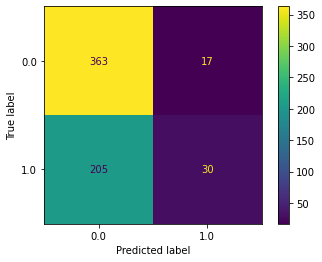

In [179]:
kernel=1.0 * RBF(1.0)
gpc = GaussianProcessClassifier(kernel, random_state=42, max_iter_predict=1000)

gpc.fit(X_train, y_train)

y_test_pred=gpc.predict(X_test)

# plot_confusion_matrix(gpc, X_train, y_train)

print(classification_report(y_test, y_test_pred))
plot_confusion_matrix(gpc, X_test, y_test)

In [180]:
models = ['1Initial Logistic Regression', '2Initial Decision Tree', '3Initial KNN', 
          '4Logistic Regression with Degree 2 Poly', '5DecisionTreepoly', '6DecisionTreepolywGS',
          '7randomforestGS', '8singlefeaturelogistic', '9fivefeaturelogistic',
          '10gradientboostingclassifier', '11gbcgridsearched', '12adaboostondectreewGS',
          '13adaboostongridsearchedrandomforest', '14baggedtcwGS', '15gaussianclassifier']
number =            [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.10, 0.11, 0.12, 0.13, 0.14, 0.15]
accuracies =        [0.48, 0.62, 0.65, 0.61, 0.57, 0.62, 0.67, 0.51, 0.49, 0.66, 0.66, 0.62, 0.67, 0.64, 0.64]
precision_potable = [0.36, 0.54, 0.62, 0.49, 0.44, 0.52, 0.65, 0.41, 0.37, 0.58, 0.58, 0.51, 0.65, 0.62, 0.64]
recall_potable =    [0.42, 0.26, 0.25, 0.55, 0.42, 0.14, 0.32, 0.64, 0.47, 0.42, 0.43, 0.46, 0.31, 0.14, 0.13]


# Performance of Classifiers on ph and  Chloramines, Sulfate

Text(0, 0.5, 'Chloramines (test)')

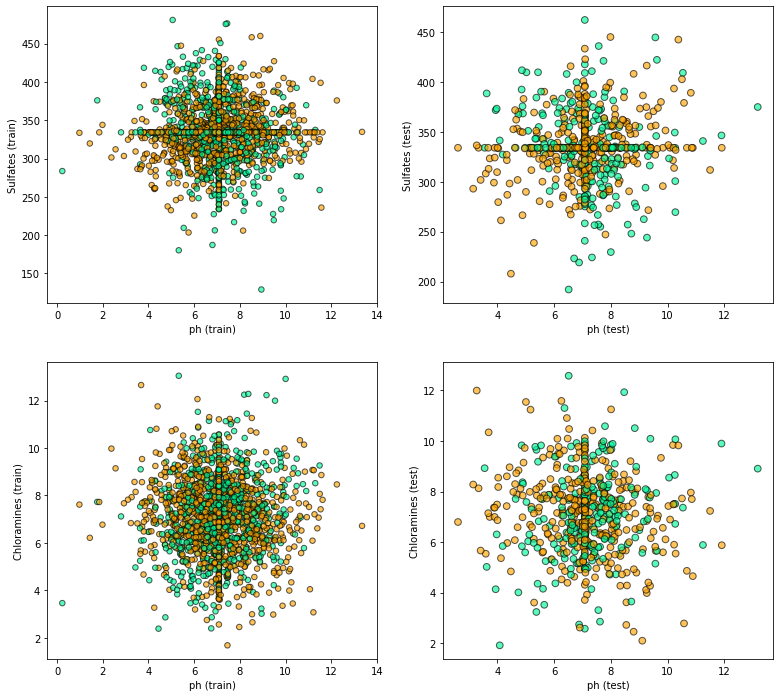

In [181]:
features = ['ph', 'Chloramines','Sulfate']

fig, axs = plt.subplots(2, 2, figsize = (13,12))

colors = {0:'orange', 1:'mediumspringgreen'}

axs[0, 0].scatter(X_train['ph'], X_train['Sulfate'], c = y_train.map(colors), alpha = 0.65, s = 30, edgecolor = 'k')
axs[0, 0].set_xlabel('ph (train)')
axs[0, 0].set_ylabel('Sulfates (train)')
axs[0, 1].scatter(X_test['ph'], X_test['Sulfate'], c = y_test.map(colors), alpha = 0.65, s = 45, edgecolor = 'k')
axs[0, 1].set_xlabel('ph (test)')
axs[0, 1].set_ylabel('Sulfates (test)')
axs[1, 0].scatter(X_train['ph'], X_train['Chloramines'], c = y_train.map(colors), alpha = 0.65, s = 30, edgecolor = 'k')
axs[1, 0].set_xlabel('ph (train)')
axs[1, 0].set_ylabel('Chloramines (train)')
axs[1, 1].scatter(X_test['ph'], X_test['Chloramines'], c = y_test.map(colors), alpha = 0.65, s = 45, edgecolor = 'k')
axs[1, 1].set_xlabel('ph (test)')
axs[1, 1].set_ylabel('Chloramines (test)')

#for a in range(0,9,1):
#    for b in range(0,9,1):
#        axs[a, b].scatter(dataset[features[b]], dataset[features[a]], c=dataset['Potability'].map(colors), alpha = 0.5, s = 0.75)
#        if a == len(features) - 1:
#            axs[a, b].set_xlabel(features[b])
#        if b == 0:
#            axs[a, b].set_ylabel(features[a])    
        

Automatically created module for IPython interactive environment


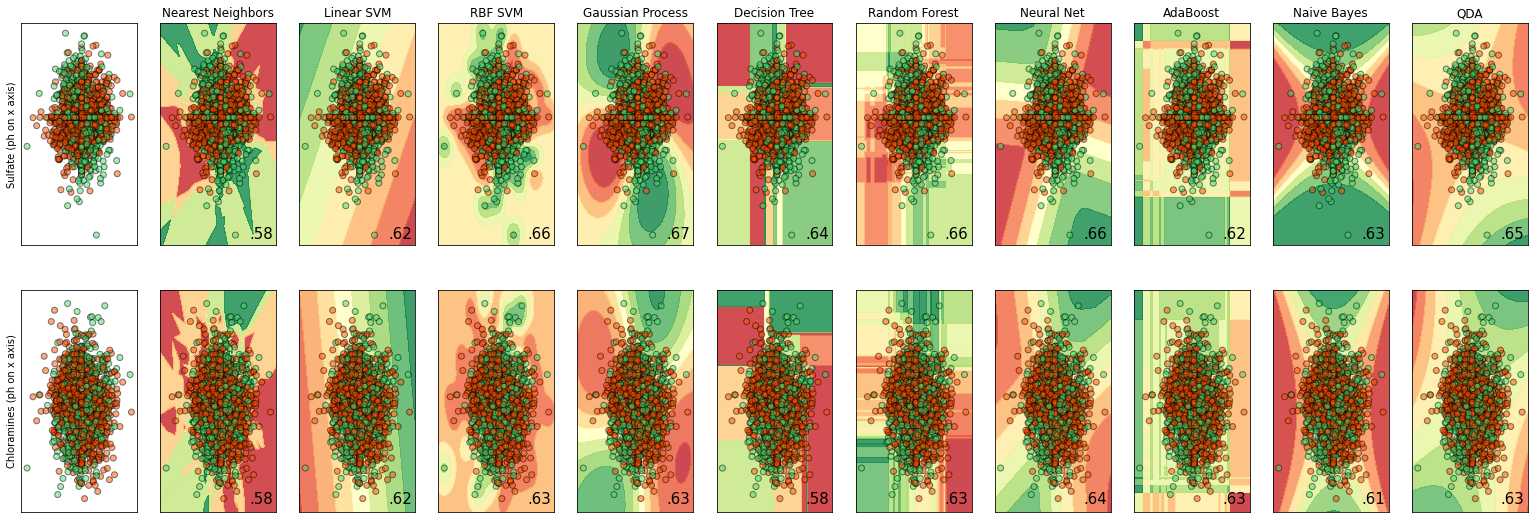

In [182]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller

# License: BSD 3 clause


from matplotlib.colors import ListedColormap

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

datasets = [water_imputed[['ph', 'Sulfate']], water_imputed[['ph', 'Chloramines']]]

figure = plt.figure(figsize=(27, 9))
i = 1

# iterate over datasets
for a, ds in enumerate(datasets):
  
    # preprocess dataset, split into training and test part
    X, y = ds, target
    X = StandardScaler().fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

    #x is ph, y is Sulfate and then Chloramines
    #set grid size 0.5 bigger on each end than range of data
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
    #set up meshgrid of this size in increment h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdYlGn
    cm_bright = ListedColormap(['#FF5100', '#47de6d'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k', alpha = 0.5)
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.5,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if a == 0:
        ax.set_ylabel('Sulfate (ph on x axis)')
    if a != 0:
        ax.set_ylabel('Chloramines (ph on x axis)')
    i += 1
    
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k', alpha = 0.5)
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.5)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        
        if i < 12:
            ax.set_title(name)
            
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

        
        i += 1



plt.show()



# Visually Examining ph, Sulfate and Chloramines

In [183]:
from mpl_toolkits import mplot3d

In [184]:
potable = water_imputed[water_imputed['Potability'] == 1]
impotable = water_imputed[water_imputed['Potability'] == 0]

In [185]:
drinkable_max_chl = potable[potable['Chloramines'] == potable['Chloramines'].max()]
undrinkable_max_chl = impotable[impotable['Chloramines'] == impotable['Chloramines'].max()]
drinkable_max_ph = potable[potable['ph'] == potable['ph'].max()]
undrinkable_max_ph = impotable[impotable['ph'] == impotable['ph'].max()]
drinkable_max_sul = potable[potable['Sulfate'] == potable['Sulfate'].max()]
undrinkable_max_sul = impotable[impotable['Sulfate'] == impotable['Sulfate'].max()]

drinkable_min_chl = potable[potable['Chloramines'] == potable['Chloramines'].min()]
undrinkable_min_chl = impotable[impotable['Chloramines'] == impotable['Chloramines'].min()]
drinkable_min_ph = potable[potable['ph'] == potable['ph'].min()]
undrinkable_min_ph = impotable[impotable['ph'] == impotable['ph'].min()]
drinkable_min_sul = potable[potable['Sulfate'] == potable['Sulfate'].min()]
undrinkable_min_sul = impotable[impotable['Sulfate'] == impotable['Sulfate'].min()]

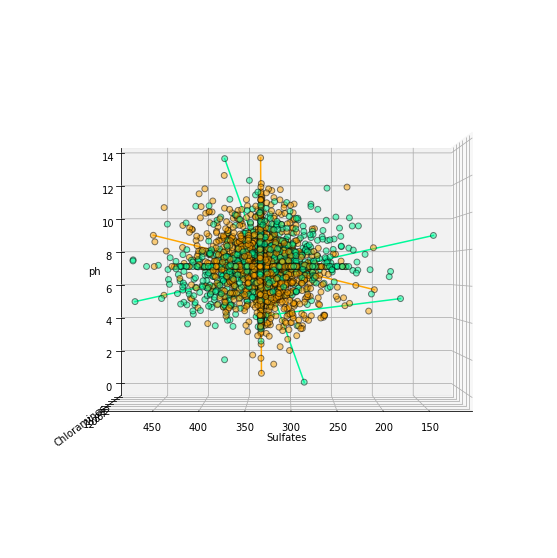

In [186]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')



xdata = water_imputed['Sulfate']
zdata = water_imputed['ph']
ydata = water_imputed['Chloramines']

ax.set_xlabel('Sulfates')
ax.set_ylabel('Chloramines')
ax.set_zlabel('ph')

ax.scatter3D(xdata, ydata, zdata, alpha = 0.5, c=dataset['Potability'].map(colors),edgecolor='k',s=35)

xdata = water_imputed['Sulfate']
zdata = water_imputed['ph']
ydata = water_imputed['Chloramines']

ax.plot3D([undrinkable_max_chl['Sulfate'].max(), undrinkable_min_chl['Sulfate'].max()], 
          [undrinkable_max_chl['Chloramines'].max(), undrinkable_min_chl['Chloramines'].max()], 
          [undrinkable_max_chl['ph'].max(), undrinkable_min_chl['ph'].max()], 
          'orange') # not drinkable chl extremes
ax.plot3D([drinkable_max_chl['Sulfate'].max(), drinkable_min_chl['Sulfate'].max()], 
          [drinkable_max_chl['Chloramines'].max(), drinkable_min_chl['Chloramines'].max()], 
          [drinkable_max_chl['ph'].max(), drinkable_min_chl['ph'].max()], 
          'mediumspringgreen') # drinkable chl extremes
ax.plot3D([undrinkable_max_ph['Sulfate'].max(), undrinkable_min_ph['Sulfate'].max()], 
          [undrinkable_max_ph['Chloramines'].max(), undrinkable_min_ph['Chloramines'].max()], 
          [undrinkable_max_ph['ph'].max(), undrinkable_min_ph['ph'].max()], 
          'orange') # not drinkable ph extremes
ax.plot3D([drinkable_max_ph['Sulfate'].max(), drinkable_min_ph['Sulfate'].max()], 
          [drinkable_max_ph['Chloramines'].max(), drinkable_min_ph['Chloramines'].max()], 
          [drinkable_max_ph['ph'].max(), drinkable_min_ph['ph'].max()], 
          'mediumspringgreen') # drinkable ph extremes
ax.plot3D([undrinkable_max_sul['Sulfate'].max(), undrinkable_min_sul['Sulfate'].max()], 
          [undrinkable_max_sul['Chloramines'].max(), undrinkable_min_sul['Chloramines'].max()], 
          [undrinkable_max_sul['ph'].max(), undrinkable_min_sul['ph'].max()], 
          'orange') # not drinkable ph extremes
ax.plot3D([drinkable_max_sul['Sulfate'].max(), drinkable_min_sul['Sulfate'].max()], 
          [drinkable_max_sul['Chloramines'].max(), drinkable_min_sul['Chloramines'].max()], 
          [drinkable_max_sul['ph'].max(), drinkable_min_sul['ph'].max()], 
          'mediumspringgreen') # drinkable ph extremes

ax.view_init(0,90)




# Visually Examining Turbidity, Trihalomethanes and Chloramines

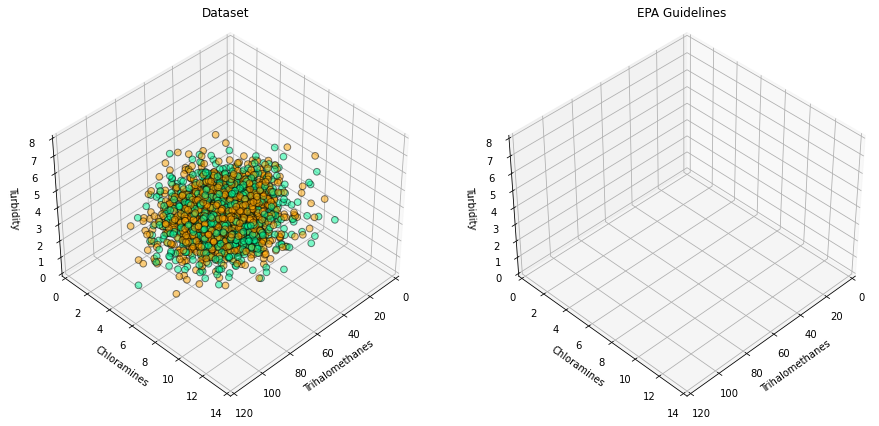

In [187]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(15,7))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

zdata = water_imputed['Turbidity']
xdata = water_imputed['Trihalomethanes']
ydata = water_imputed['Chloramines']
ax.set_xlabel('Trihalomethanes')
ax.set_ylabel('Chloramines')
ax.set_zlabel('Turbidity')
ax.scatter3D(xdata, ydata, zdata, alpha = 0.5, c=dataset['Potability'].map(colors),edgecolor='k',s=45)

ax.set_xlim(0,120)
ax.set_ylim(0,14)
ax.set_zlim(0,8)

ax.set_title("Dataset")

ax.view_init(40, 45)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')


EPApotable = water_imputed[water_imputed['Turbidity'] <= 1]
EPApotable = EPApotable[EPApotable['Trihalomethanes'] <= 80]
EPApotable = EPApotable[EPApotable['Chloramines'] <= 4]

zdata = EPApotable['Turbidity']
xdata = EPApotable['Trihalomethanes']
ydata = EPApotable['Chloramines']
ax.set_xlabel('Trihalomethanes')
ax.set_ylabel('Chloramines')
ax.set_zlabel('Turbidity')
ax.scatter3D(xdata, ydata, zdata, alpha = 0.5, c=EPApotable['Potability'].map(colors),edgecolor='k',s=45)
ax.view_init(0, 45)

ax.set_xlim(0,120)
ax.set_ylim(0,14)
ax.set_zlim(0,8)

ax.set_title("EPA Guidelines")

ax.view_init(40, 45)

plt.show()

# Refit to entire dataset

In [188]:
grid = {
    "n_estimators" : [400, 500, 600],
    "max_depth": [30, 35,45],
    "criterion": ["gini", "entropy"],
     "class_weight": ["balanced"]

    }

gs_final=GridSearchCV(RandomForestClassifier(), grid, cv=5, scoring="precision", n_jobs=-1, verbose=1)

gs_final.fit(poly_water, water["Potability"])

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   36.3s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  2.1min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 35, 45],
                         'n_estimators': [400, 500, 600]},
             scoring='precision', verbose=1)

# Pickle Model

In [111]:
import pickle

pickle_out = open("Data/model.pickle","wb")
pickle.dump(gs_final, pickle_out)
pickle_out.close()


In [112]:
other_info = [poly_water]

pickle_out = open("Data/other.pickle","wb")
pickle.dump(other_info, pickle_out)
pickle_out.close()
